In [1]:
!pip install torch-geometric

In [15]:
from torch_geometric.datasets import Planetoid

# Load the CORA dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Access the first graph object
data = dataset[0]

In [3]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [18]:
# # Nếu có các đặc trưng của nút (node features), cần chuyển các giá trị thành chuỗi hoặc bỏ qua
# for node in G.nodes():
#     features = G.nodes[node].get('features', None)
#     if features is not None:
#         # Chuyển các đặc trưng thành chuỗi hoặc loại bỏ
#         G.nodes[node]['features'] = features.tolist()  # Hoặc chuyển đổi thành chuỗi: str(features)

# # Lưu đồ thị có hướng dưới dạng file .gml
# file_path_gml = "cora_graph_directed.gml"
# nx.write_gml(G, file_path_gml)

# # Trả về đường dẫn của file .gml đã lưu
# file_path_gml


'cora_graph_directed.gml'

# Đưa dữ liệu vào graph

Số lượng nút: 2708
Số lượng cạnh: 10556


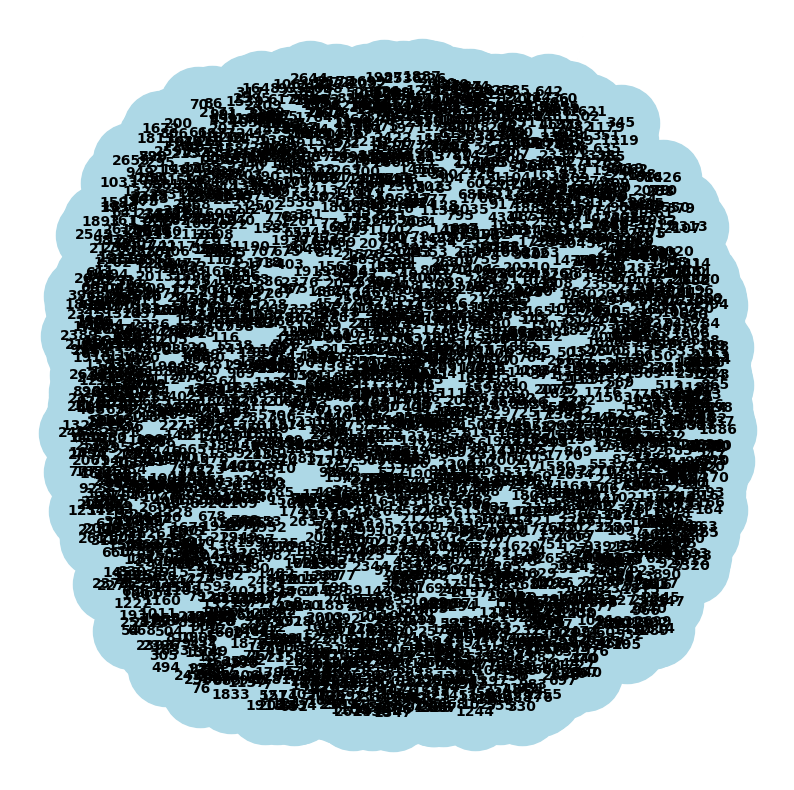

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import torch

# Lấy các dữ liệu từ data (torch_geometric)
node_features = data.x.numpy()  # Đặc trưng của các nút (numpy array)
edge_index = data.edge_index.numpy()  # Chỉ số các cạnh (numpy array)
node_labels = data.y.numpy()  # Nhãn của các nút
train_mask = data.train_mask.numpy()  # Mask cho tập huấn luyện
val_mask = data.val_mask.numpy()  # Mask cho tập validation
test_mask = data.test_mask.numpy()  # Mask cho tập kiểm tra

# Khởi tạo đồ thị có hướng NetworkX
G = nx.DiGraph()

# Thêm các nút vào đồ thị, với nhãn và đặc trưng (features)
for i in range(node_features.shape[0]):
    G.add_node(i, features=node_features[i], label=node_labels[i])

# Thêm các cạnh vào đồ thị từ edge_index (đảm bảo là đồ thị có hướng)
for i in range(edge_index.shape[1]):
    G.add_edge(edge_index[0, i], edge_index[1, i])

# Kiểm tra số lượng nút và cạnh trong đồ thị
print(f"Số lượng nút: {G.number_of_nodes()}")
print(f"Số lượng cạnh: {G.number_of_edges()}")

# Vẽ đồ thị có hướng và điều chỉnh vị trí các nút
plt.figure(figsize=(10, 10))

# Sử dụng spring_layout để tối ưu vị trí các nút tránh trùng lặp
pos = nx.spring_layout(G, k=0.15, iterations=20)  # k điều chỉnh khoảng cách giữa các nút

# Vẽ các cạnh
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)

# Vẽ các nút
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

# Vẽ nhãn nếu cần, nhưng không hiển thị tên nút nếu không cần
# Nếu không muốn hiển thị nhãn, bạn có thể bỏ dòng này
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.axis('off')  # Tắt trục
plt.show()


# Tính các số đô

In [5]:
import networkx as nx
import pandas as pd


# Tính toán các chỉ số cần thiết
average_degree = sum(dict(G.degree()).values()) / len(G.nodes())
# Đoạn mã dưới đây tính diameter cho đồ thị có hướng (chỉ có thể tính được nếu đồ thị có thể liên thông)
try:
    network_diameter = nx.diameter(G.to_undirected())  # Chuyển đồ thị có hướng sang đồ thị vô hướng trước khi tính diameter
except nx.NetworkXError:  # Nếu đồ thị không liên thông thì không thể tính diameter
    network_diameter = None

graph_density = nx.density(G)
connected_components = list(nx.strongly_connected_components(G))  # Tìm các thành phần liên thông mạnh trong đồ thị có hướng

# Lưu các chỉ số vào DataFrame
data = {
    'Metric': ['Average Degree', 'Network Diameter', 'Graph Density', 'Connected Components'],
    'Value': [average_degree, network_diameter, graph_density, len(connected_components)]
}

df = pd.DataFrame(data)

# Lưu vào file Excel
df.to_excel('network_metrics.xlsx', index=False, engine='openpyxl')

print("Chỉ số mạng đã được lưu vào file 'network_metrics.xlsx'.")


Chỉ số mạng đã được lưu vào file 'network_metrics.xlsx'.


# Các chỉ số bậc trung tâm

In [6]:
import networkx as nx
import pandas as pd

# Tính toán các chỉ số
degree = dict(G.degree())  # Bậc của các nút
degree_in = dict(G.in_degree())  # Bậc vào của các nút
degree_out = dict(G.out_degree())  # Bậc ra của các nút

degree_centrality = nx.degree_centrality(G)  # Độ trung tâm bậc
betweenness_centrality = nx.betweenness_centrality(G)  # Độ trung tâm trung gian
closeness_centrality = nx.closeness_centrality(G)  # Độ trung tâm gần gũi

# Tạo DataFrame để lưu kết quả
data = {
    'Node': list(G.nodes),
    'Degree': [degree[node] for node in G.nodes],
    'In-Degree': [degree_in[node] for node in G.nodes],
    'Out-Degree': [degree_out[node] for node in G.nodes],
    'Degree Centrality': [degree_centrality[node] for node in G.nodes],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes],
}

df = pd.DataFrame(data)

# Lưu vào file Excel
df.to_excel('Central_metric_Hung.xlsx', index=False, engine='openpyxl')

print("Chỉ số trung tâm mạng đã được lưu vào file 'Central_metric_Hung.xlsx'.")


Chỉ số trung tâm mạng đã được lưu vào file 'Central_metric_Hung.xlsx'.


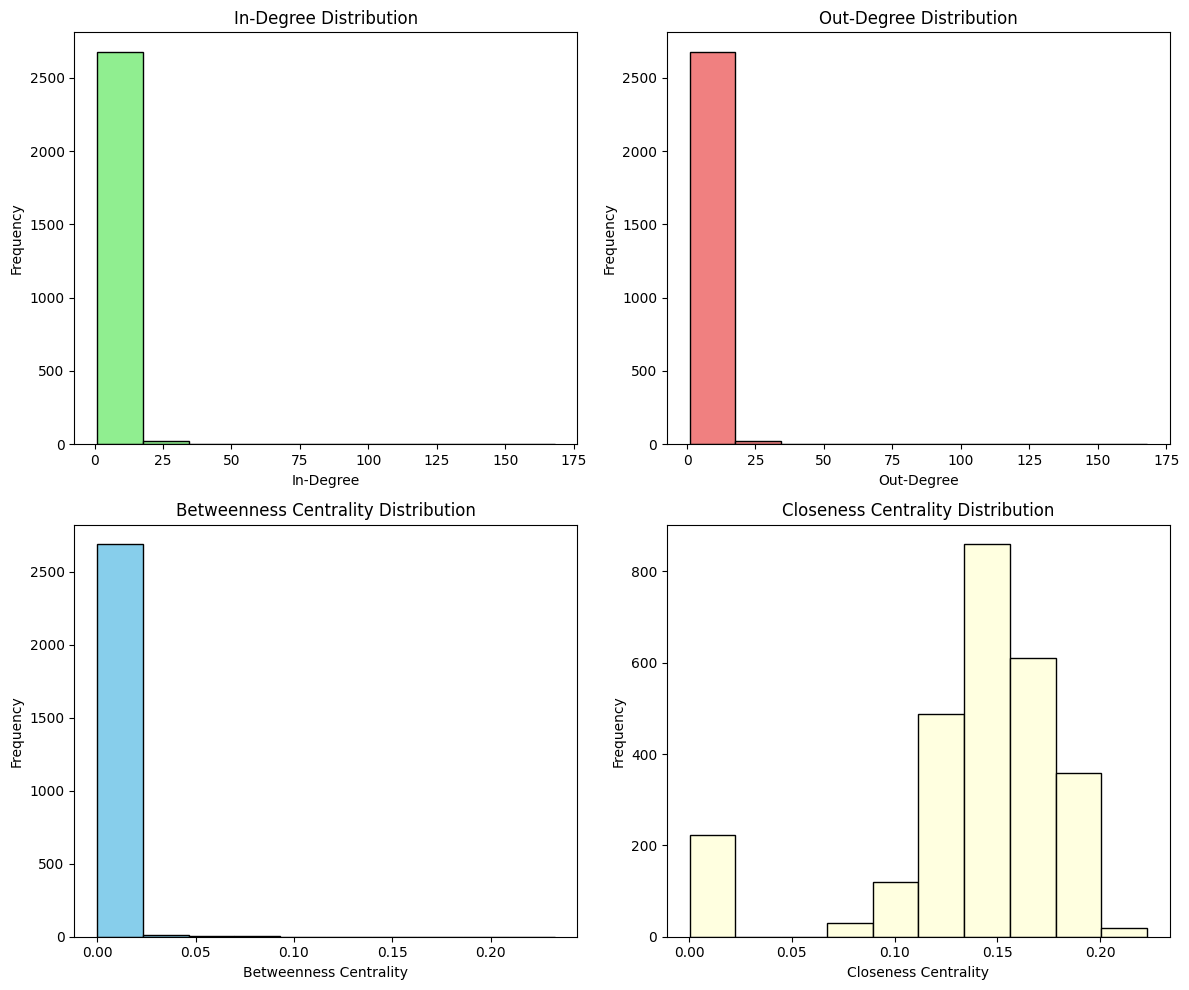

Các đồ thị histogram đã được lưu vào 'centrality_histograms.png'.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file Excel chứa các chỉ số
df = pd.read_excel('Central_metric_Hung.xlsx')

# Vẽ các phân phối histogram cho In-Degree, Out-Degree, Betweenness Centrality, và Closeness Centrality
plt.figure(figsize=(12, 10))

# Vẽ phân phối In-Degree
plt.subplot(2, 2, 1)
plt.hist(df['In-Degree'], bins=10, color='lightgreen', edgecolor='black')
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

# Vẽ phân phối Out-Degree
plt.subplot(2, 2, 2)
plt.hist(df['Out-Degree'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

# Vẽ phân phối Betweenness Centrality
plt.subplot(2, 2, 3)
plt.hist(df['Betweenness Centrality'], bins=10, color='skyblue', edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# Vẽ phân phối Closeness Centrality
plt.subplot(2, 2, 4)
plt.hist(df['Closeness Centrality'], bins=10, color='lightyellow', edgecolor='black')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

# Điều chỉnh layout để không bị chồng lấp
plt.tight_layout()

# Lưu đồ thị vào file PNG
plt.savefig('centrality_histograms_Hung.png')

# Hiển thị đồ thị
plt.show()

print("Các đồ thị histogram đã được lưu vào 'centrality_histograms.png'.")


# Phân cụm Louvain\

---



In [8]:
!pip install networkx pandas matplotlib python-louvain


<ipython-input-12-94c2ede8ed35>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", max(partition.values()) + 1)  # Lấy bảng màu cho từng cộng đồng


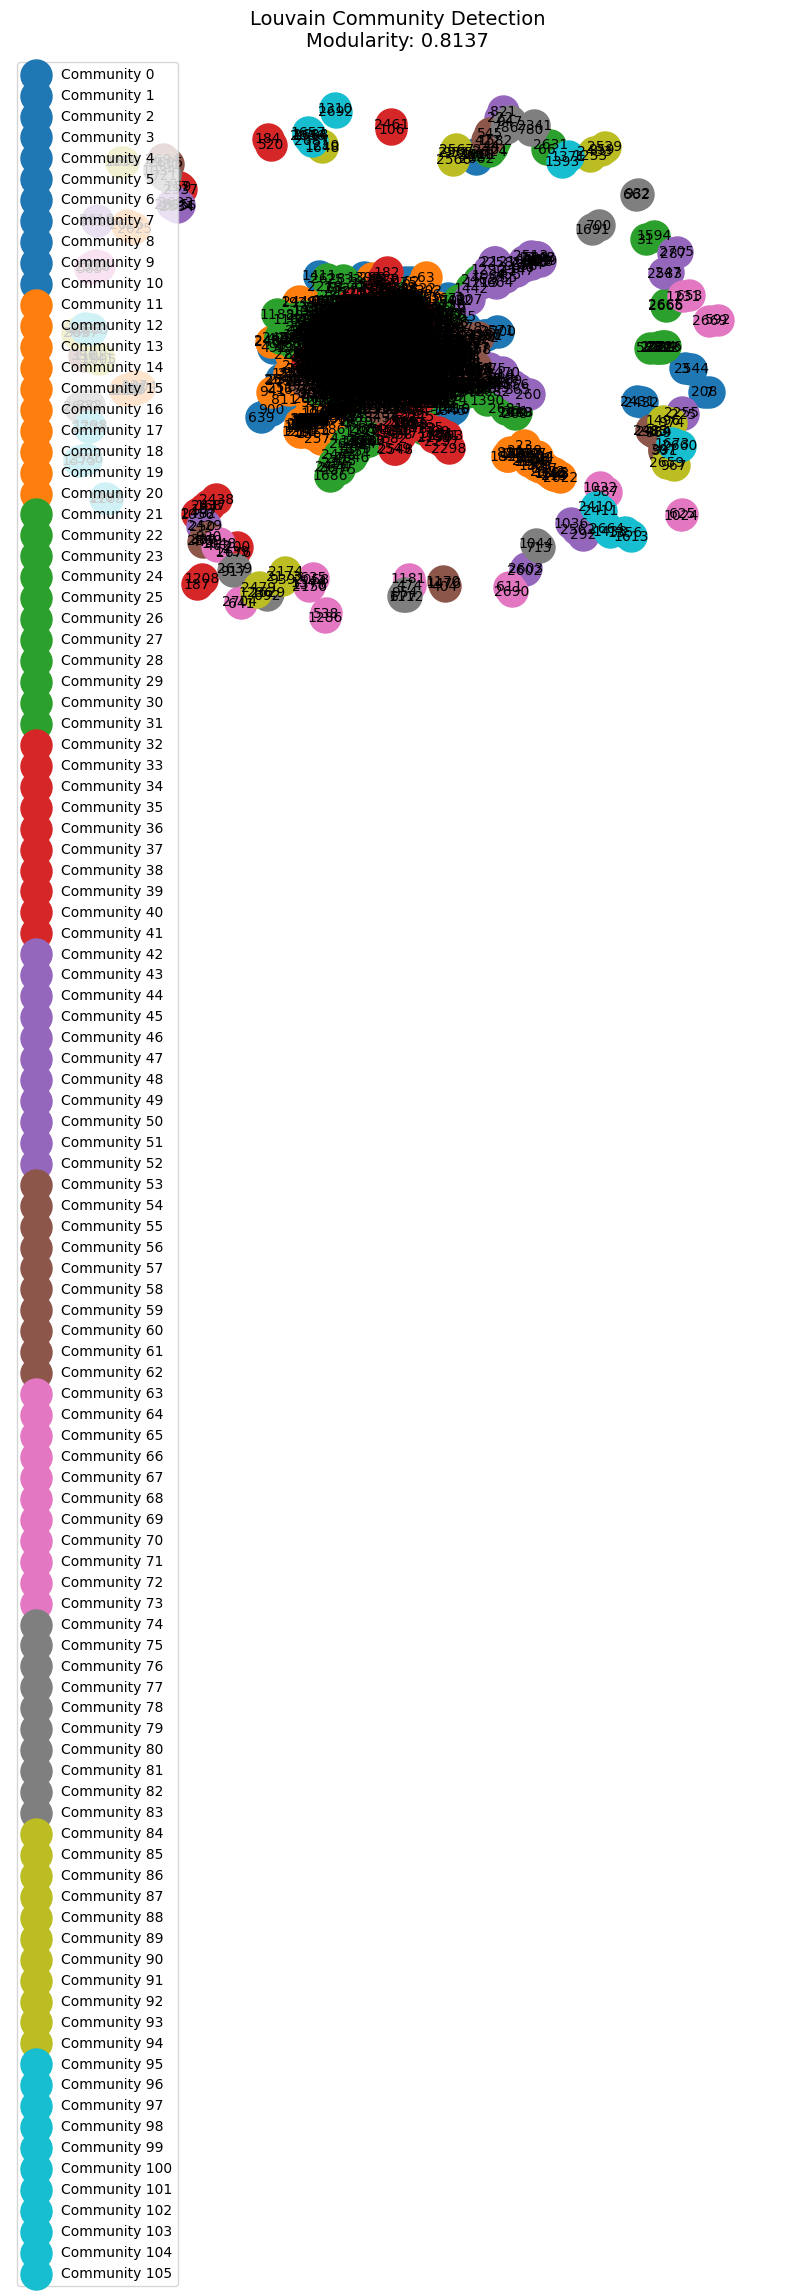

Số lượng cộng đồng: 106
Modularity: 0.8137


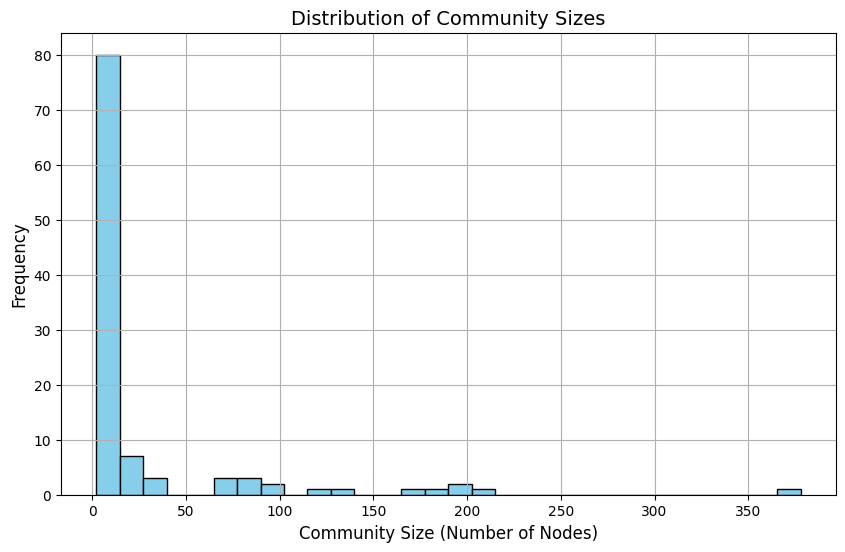

In [12]:
import networkx as nx
import community as community_louvain  # Thư viện python-louvain
import matplotlib.pyplot as plt



# Chuyển đổi đồ thị có hướng sang đồ thị vô hướng (Louvain không hỗ trợ trực tiếp với đồ thị có hướng)
G_undirected = G.to_undirected()

# Áp dụng phân cụm Louvain
partition = community_louvain.best_partition(G_undirected)

# Tính toán Modularities
modularity = community_louvain.modularity(partition, G_undirected)

# Vẽ đồ thị phân cụm
plt.figure(figsize=(10, 8))

# Vẽ các nút với màu sắc khác nhau cho từng cộng đồng
pos = nx.spring_layout(G_undirected)  # Vị trí của các nút
cmap = plt.cm.get_cmap("tab10", max(partition.values()) + 1)  # Lấy bảng màu cho từng cộng đồng
for community_num in set(partition.values()):
    nodes_in_community = [node for node, comm in partition.items() if comm == community_num]
    nx.draw_networkx_nodes(G_undirected, pos, nodes_in_community, node_size=500, node_color=[cmap(community_num)], label=f'Community {community_num}')

# Vẽ các cạnh
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
nx.draw_networkx_labels(G_undirected, pos, font_size=10, font_color='black')

# Thêm tiêu đề và hiển thị modularity
plt.title(f'Louvain Community Detection\nModularity: {modularity:.4f}', fontsize=14)
plt.axis('off')  # Tắt trục
plt.legend()  # Hiển thị chú thích cộng đồng
plt.show()

# In ra số lượng cộng đồng và modularity
print(f"Số lượng cộng đồng: {len(set(partition.values()))}")
print(f"Modularity: {modularity:.4f}")

# Vẽ phân phối số lượng nút trong từng cộng đồng
community_sizes = [len([node for node, comm in partition.items() if comm == community_num]) for community_num in set(partition.values())]

# Vẽ biểu đồ phân phối số lượng nút trong mỗi cộng đồng
plt.figure(figsize=(10, 6))

# Điều chỉnh số lượng bin nếu số cộng đồng quá lớn (99 cộng đồng trong trường hợp của bạn)
plt.hist(community_sizes, bins=30, color='skyblue', edgecolor='black')  # Sử dụng bins=30 hoặc điều chỉnh theo số lượng cộng đồng
plt.title('Distribution of Community Sizes', fontsize=14)
plt.xlabel('Community Size (Number of Nodes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


# Dự đoán liên kết mạng

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import torch_geometric
from torch_geometric.data import Data
import numpy as np
import networkx as nx

# Tạo đồ thị và chuẩn bị dữ liệu
G = nx.DiGraph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (1, 3), (2, 4)])

# Khởi tạo dữ liệu mô phỏng
node_features = np.random.rand(G.number_of_nodes(), 16)  # Đặc trưng ngẫu nhiên cho các nút
edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()

x = torch.tensor(node_features, dtype=torch.float)
y = torch.zeros(G.number_of_nodes(), dtype=torch.long)  # Nhãn cho các nút

data = Data(x=x, edge_index=edge_index)

# Tạo các cặp dương và âm (positive và negative pairs)
positive_pairs = list(G.edges)
num_nodes = G.number_of_nodes()
all_pairs = np.array([(i, j) for i in range(num_nodes) for j in range(i + 1, num_nodes)])
negative_pairs = []

while len(negative_pairs) < len(positive_pairs):
    node1, node2 = all_pairs[np.random.choice(len(all_pairs))]
    if not G.has_edge(node1, node2):
        negative_pairs.append((node1, node2))

positive_pairs = torch.tensor(positive_pairs, dtype=torch.long).t().contiguous()
negative_pairs = torch.tensor(negative_pairs, dtype=torch.long).t().contiguous()

train_pairs = torch.cat([positive_pairs, negative_pairs], dim=1)

# Mô hình GCN cho Link Prediction
class GCNLinkPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNLinkPredictor, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        return x

model = GCNLinkPredictor(in_channels=16, hidden_channels=32, out_channels=16)  # Số đầu ra của GCN
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện mô hình
def train(model, data, train_pairs, optimizer):
    model.train()
    optimizer.zero_grad()

    x = data.x
    edge_index = data.edge_index
    out = model(x, edge_index)

    node1_embeddings = out[train_pairs[0]]
    node2_embeddings = out[train_pairs[1]]
    similarities = (node1_embeddings * node2_embeddings).sum(dim=1)

    labels = torch.cat([torch.ones(positive_pairs.shape[1]), torch.zeros(negative_pairs.shape[1])])
    loss = nn.BCEWithLogitsLoss()(similarities, labels)

    loss.backward()
    optimizer.step()
    return loss.item()

# Huấn luyện mô hình
for epoch in range(100):
    loss = train(model, data, train_pairs, optimizer)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Đánh giá mô hình
def evaluate(model, data, test_pairs):
    model.eval()

    x = data.x
    edge_index = data.edge_index
    out = model(x, edge_index)

    node1_embeddings = out[test_pairs[0]]
    node2_embeddings = out[test_pairs[1]]
    similarities = (node1_embeddings * node2_embeddings).sum(dim=1)

    return similarities

# Chia các cặp thành test
test_pairs = torch.cat([positive_pairs, negative_pairs], dim=1)

# Tính toán xác suất và dự đoán
similarities = evaluate(model, data, test_pairs)
predictions = torch.sigmoid(similarities) > 0.5

# Labeled data cho tính toán accuracy
labels = torch.cat([torch.ones(positive_pairs.shape[1]), torch.zeros(negative_pairs.shape[1])])

# Tính các chỉ số đánh giá
accuracy = accuracy_score(labels.numpy(), predictions.numpy())
auc = roc_auc_score(labels.numpy(), predictions.numpy())
precision = precision_score(labels.numpy(), predictions.numpy())
recall = recall_score(labels.numpy(), predictions.numpy())
f1 = f1_score(labels.numpy(), predictions.numpy())

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 0, Loss: 0.7843284010887146
Epoch 10, Loss: 0.6738112568855286
Epoch 20, Loss: 0.6302500367164612
Epoch 30, Loss: 0.5973405838012695
Epoch 40, Loss: 0.5721154808998108
Epoch 50, Loss: 0.5511574149131775
Epoch 60, Loss: 0.5424157977104187
Epoch 70, Loss: 0.5377148389816284
Epoch 80, Loss: 0.527170717716217
Epoch 90, Loss: 0.500747799873352
Accuracy: 0.8571
AUC: 0.8571
Precision: 1.0000
Recall: 0.7143
F1 Score: 0.8333
